In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('empreinteCarboneMissions_2022121.tsv', sep='\t')
data = data.rename(columns={'Quantité' : 'N', 'Emission (kg eCO2)': 'em'})
data

,ID,Type,Mode de deplacement,N,Statut,Nombre de personne,Motif,Aller / Retour,Distance (km),em,Incertitude (kg eCO2)
0,"1,2,99,515,868,1015,1370,1639",MX,plane,8,NaN,1,NaN,OUI,79500,6591,659
1,"1,91,280,838,871,873,962,968,988,1190,1239,135...",NaN,train,15,NaN,1,NaN,OUI,21405,64,13
2,2,MX,plane,1,NaN,1,NaN,OUI,9511,788,79
3,2,NaN,plane,1,NaN,1,NaN,OUI,875,124,12
4,3,NaN,plane,1,NaN,1,NaN,OUI,1691,239,24
...,...,...,...,...,...,...,...,...,...,...,...
603,230,MX,plane,1,NaN,1,NaN,OUI,2169,222,22
604,231,NaN,car,1,NaN,1,NaN,OUI,291,68,41
605,232,NaN,car,1,NaN,1,NaN,OUI,291,68,41
606,233,NaN,train,1,NaN,1,NaN,OUI,2008,6,1


In [58]:
dmin = float(em.min())
dmin

1.0

In [59]:
dmax = float(em.max())
dmax

2859.0

In [60]:
dmax = 3000
dmax

3000

In [61]:
step = 100
bins = np.arange(0, dmax + step, step)
nbins = len(bins)
bins

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000])

In [62]:
dl = np.diff(bins)[0]
dl

100

In [63]:
index = np.digitize(em, bins, right=True)

In [64]:
outputs = np.zeros((len(bins) - 1), dtype=float)
for i in np.unique(index):
    iok = np.nonzero(index == i)[0]
    outputs[i - 1] = N[iok].sum()

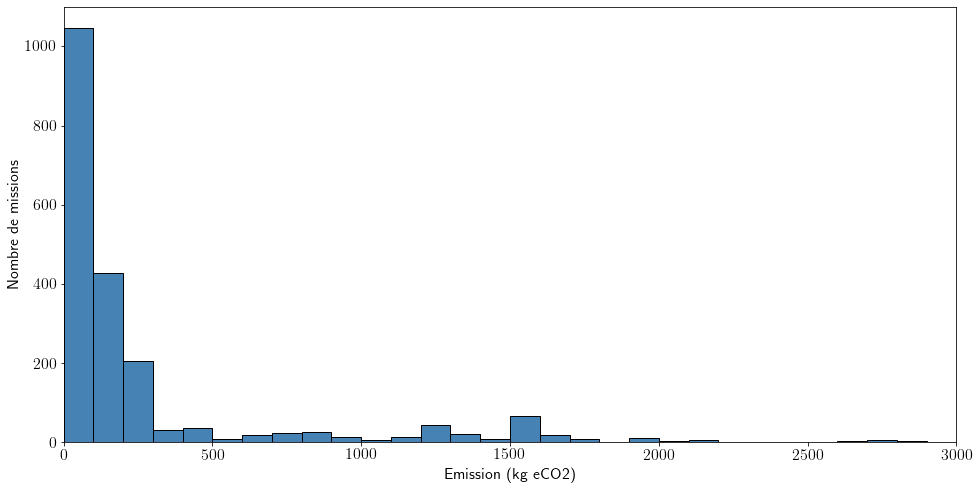

In [65]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8), facecolor='white')
plt.bar(bins[slice(0, nbins - 1)], outputs, width=dl, align='edge', color='steelblue', edgecolor='k')
plt.xlabel('Emission (kg eCO2)')
plt.ylabel('Nombre de missions')
plt.xlim(0, dmax)
plt.savefig('number_missions_eco2.png', bbox_inches='tight')

In [66]:
em = subdata['em'] * 1e-3  # conversion of emissions into tons.
intem = em * subdata['N']  # integrate emissions by multiplying emissions by number of missions
emtot = intem.sum()  # total emmissions in tons.
emtot

542.146

In [68]:
threslist = [10, 8, 6, 5]  # list of thresholds
for thres  in threslist:
    test = (em > thres)  # true if emissions exceeds the threshold    
    remem = intem[test].sum()  # integrates the total emissions 
    perc = (remem / emtot) * 100
    print('Threshold = %d tons: reduction = %.2f' %(thres, perc) + '% of total')

Threshold = 10 tons: reduction = 0.00% of total
Threshold = 8 tons: reduction = 0.00% of total
Threshold = 6 tons: reduction = 0.00% of total
Threshold = 5 tons: reduction = 0.00% of total
